In [1]:
import scanpy as sc
import scvi

adata = sc.read("data/dataset_glutamatergic.h5ad")

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
adata

AnnData object with n_obs × n_vars = 282930 × 61427
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatche

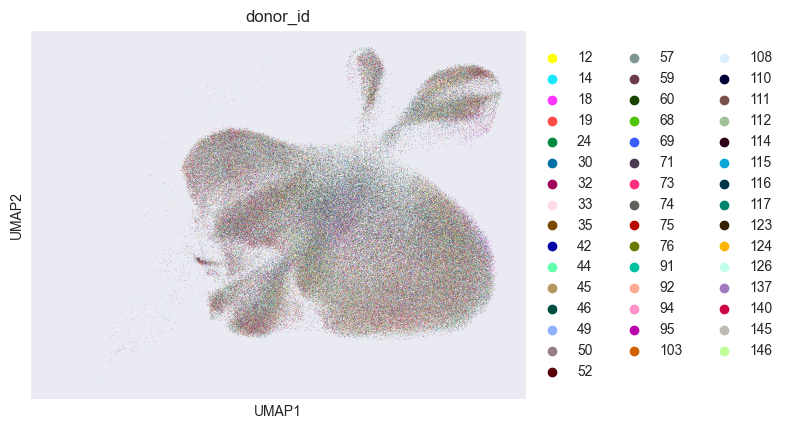

In [2]:
sc.pl.umap(
    adata,
    color=["donor_id"],
)

In [3]:
sc.pp.highly_variable_genes(
    adata, n_top_genes=2000, flavor="cell_ranger", batch_key="donor_id"
)
adata.var

,mt,ribo,hb,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ENSEMBLE GENE,,,,,,,,,,,,,,,
ENSG00000186827,False,False,False,False,TNFRSF4,NCBITaxon:9606,gene,1039,protein_coding,False,0.005531,1.390772,0.640144,6,False
ENSG00000186891,False,False,False,False,TNFRSF18,NCBITaxon:9606,gene,789,protein_coding,False,0.008134,1.412726,0.521324,3,False
ENSG00000160072,False,False,False,False,ATAD3B,NCBITaxon:9606,gene,3300,protein_coding,False,0.125872,1.396130,0.198149,0,False
ENSG00000260179,False,False,False,False,ENSG00000260179,NCBITaxon:9606,gene,1558,lncRNA,False,0.000413,0.919456,0.243414,0,False
ENSG00000234396,False,False,False,False,ENSG00000234396,NCBITaxon:9606,gene,326,lncRNA,False,0.008827,1.385424,0.369782,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000271254,False,False,False,False,ENSG00000271254,NCBITaxon:9606,gene,2922,protein_coding,False,0.016775,1.320092,-0.279072,0,False
ENSG00000275987,False,False,False,False,U1,NCBITaxon:9606,gene,144,snRNA,False,0.000027,0.113343,0.045382,0,False
ENSG00000268674,False,False,False,False,ENSG00000268674,NCBITaxon:9606,gene,510,protein_coding,False,0.000016,0.072987,-0.016671,0,False


highly_variable_nbatches
0     33161
1     10738
2      6882
3      4047
4      2210
5      1190
6       708
7       446
8       297
9       228
10      198
11      146
12      120
13      105
14      104
15       80
16       72
19       55
18       54
17       52
22       42
20       42
23       37
21       35
24       34
25       30
27       30
26       25
28       20
42       20
36       20
29       19
32       17
33       17
31       17
37       16
41       16
38       16
34       14
45       14
39       10
30       10
35        9
43        9
44        7
40        5
46        3
Name: count, dtype: int64

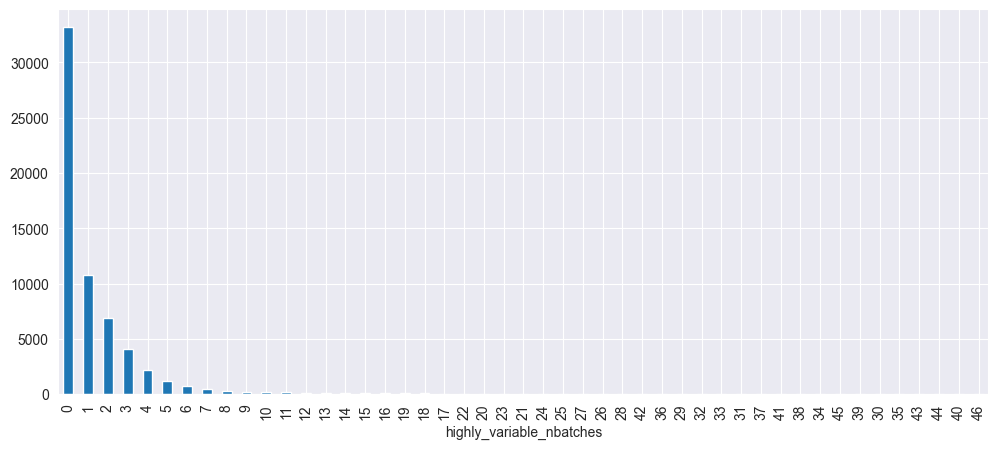

In [7]:
n_batches = adata.var["highly_variable_nbatches"].value_counts()
ax = n_batches.plot(kind="bar", figsize=(12, 5))
n_batches

In [5]:
adata_hvg = adata[:, adata.var["highly_variable"]].copy()
adata_hvg

AnnData object with n_obs × n_vars = 282930 × 2000
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches

In [8]:
adata_scvi = adata_hvg.copy()

In [10]:
scvi.model.SCVI.setup_anndata(adata_scvi, batch_key="donor_id")
adata_scvi

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


AnnData object with n_obs × n_vars = 282930 × 2000
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_n

In [13]:
scvi.model.SCVI.setup_anndata(adata_scvi, batch_key="donor_id")
model_scvi = scvi.model.SCVI(adata_scvi)
max_epochs_scvi = 150
model_scvi.train(max_epochs=max_epochs_scvi, accelerator='gpu')

adata_scvi.obsm["X_scVI"] = model_scvi.get_latent_representation()

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been set to `mps`. Please note that not all PyTorch/Jax operations are supported with this backend. as a result, some models might be slower and less accurate than usuall. Please verify your analysis!Refer to https://github.com/pytorch/pytorch/issues/77764 for more details.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:

Epoch 1/150:   0%|          | 0/150 [00:00<?, ?it/s]

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scvi/module/_vae.py:570: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scvi/module/_vae.py:570: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)

Detected KeyboardInterrupt, attempting graceful shutdown ...


SystemExit: 1

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
sc.pp.neighbors(adata_scvi, use_rep="X_scVI")
sc.tl.umap(adata_scvi)
adata_scvi

In [11]:
sc.pl.umap(
    adata_scvi,
    color=["donor_id"],
)

NameError: name 'adata_scvi' is not defined